In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [3]:
# data loading
dataframe = pd.read_csv("Dsata Set for Assignment 1 (1).csv")

In [4]:
dataframe=dataframe.set_index('id')
dataframe


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [5]:
dataframe['diagnosis'].value_counts()['B']  

357

In [6]:
l1=dataframe.columns.tolist()

l1

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [7]:

dataframe.isnull().sum()

diagnosis                  0
radius_mean                1
texture_mean               0
perimeter_mean             1
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             1
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             1
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 2
smoothness_worst           0
compactness_worst          0
concavity_worst            1
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
# Filling null with mean
for item in l1:
    if item=='diagnosis':
        continue
    dataframe=dataframe.fillna({
        item :dataframe[item].mean()
    })
    
dataframe    

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [9]:
dataframe.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
# converting diagnosis to 1 and 0
dataframe['diagnosis'] =[(1 if i is True else 0) for i in (dataframe['diagnosis']=='M')]
dataframe


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [11]:

# for item in l1:
#     if item=='diagnosis':
#         continue
#     for x in dataframe[item]:
#         x=(x-dataframe[item].mean())/dataframe[item].std()
#         print(x)


In [12]:
# normalization
normalized_df=(dataframe-dataframe.mean())/dataframe.std()
normalized_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.296535,1.102422,-2.071512,1.268389,0.983510,1.567087,3.280628,2.650837,2.530249,2.215566,...,1.885031,-1.358098,2.301575,1.998658,1.306537,2.614365,2.107374,2.294058,2.748204,1.935312
842517,1.296535,1.836635,-0.353322,1.684639,1.907030,-0.826235,-0.486643,-0.025417,0.547662,0.001391,...,1.804340,-0.368879,1.533776,1.887973,-0.375282,-0.430066,-0.147968,1.086129,-0.243675,0.280943
84300903,1.296535,1.586206,0.455786,1.565122,1.557513,0.941382,1.052000,1.361666,2.035440,0.938859,...,1.510541,-0.023953,1.346291,1.454016,0.526944,1.081980,0.853340,1.953282,1.151242,0.201214
84348301,1.296535,-0.767260,0.253509,-0.595257,-0.763792,3.280667,3.399917,1.913989,1.450431,2.864862,...,-0.281217,0.133866,-0.249720,-0.551147,3.391291,3.889975,1.987485,2.173873,6.040726,4.930672
84358402,1.296535,1.756953,-1.150804,1.775308,1.824624,0.280125,0.538866,1.369198,1.427237,-0.009552,...,1.297434,-1.465481,1.337363,1.218589,0.220362,-0.313119,0.611645,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1.296535,2.118368,0.720838,2.059677,2.341795,1.040926,0.218868,1.945370,2.318924,-0.312314,...,1.899514,0.117596,1.751022,2.012713,0.378033,-0.273077,0.662958,1.627719,-1.358963,-0.708467
926682,1.296535,1.711420,2.083301,1.614577,1.722326,0.102368,-0.017817,0.691347,1.262558,-0.217473,...,1.535369,2.045599,1.420690,1.492668,-0.690623,-0.394473,0.235195,0.733182,-0.531387,-0.973122
926954,1.296535,0.706858,2.043775,0.670803,0.577445,-0.839745,-0.038646,0.045004,0.105684,-0.808406,...,0.560868,1.373645,0.578492,0.426222,-0.808876,0.350427,0.325352,0.413705,-1.103578,-0.318129


In [13]:
normalized_df['diagnosis'] =[(1 if i is True else 0) for i in (normalized_df['diagnosis']>1)]

In [14]:
normalized_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,1.102422,-2.071512,1.268389,0.983510,1.567087,3.280628,2.650837,2.530249,2.215566,...,1.885031,-1.358098,2.301575,1.998658,1.306537,2.614365,2.107374,2.294058,2.748204,1.935312
842517,1,1.836635,-0.353322,1.684639,1.907030,-0.826235,-0.486643,-0.025417,0.547662,0.001391,...,1.804340,-0.368879,1.533776,1.887973,-0.375282,-0.430066,-0.147968,1.086129,-0.243675,0.280943
84300903,1,1.586206,0.455786,1.565122,1.557513,0.941382,1.052000,1.361666,2.035440,0.938859,...,1.510541,-0.023953,1.346291,1.454016,0.526944,1.081980,0.853340,1.953282,1.151242,0.201214
84348301,1,-0.767260,0.253509,-0.595257,-0.763792,3.280667,3.399917,1.913989,1.450431,2.864862,...,-0.281217,0.133866,-0.249720,-0.551147,3.391291,3.889975,1.987485,2.173873,6.040726,4.930672
84358402,1,1.756953,-1.150804,1.775308,1.824624,0.280125,0.538866,1.369198,1.427237,-0.009552,...,1.297434,-1.465481,1.337363,1.218589,0.220362,-0.313119,0.611645,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,2.118368,0.720838,2.059677,2.341795,1.040926,0.218868,1.945370,2.318924,-0.312314,...,1.899514,0.117596,1.751022,2.012713,0.378033,-0.273077,0.662958,1.627719,-1.358963,-0.708467
926682,1,1.711420,2.083301,1.614577,1.722326,0.102368,-0.017817,0.691347,1.262558,-0.217473,...,1.535369,2.045599,1.420690,1.492668,-0.690623,-0.394473,0.235195,0.733182,-0.531387,-0.973122
926954,1,0.706858,2.043775,0.670803,0.577445,-0.839745,-0.038646,0.045004,0.105684,-0.808406,...,0.560868,1.373645,0.578492,0.426222,-0.808876,0.350427,0.325352,0.413705,-1.103578,-0.318129


In [15]:
# confusioin matrix
def confusion_matrix(y_test,y_pred):
    mat = np.zeros((2,2))
    for i in range(len(y_test)):
        if(y_test[i] == 0 and y_pred[i] == 0):
            mat[0][0] += 1
        if(y_test[i] == 0 and y_pred[i] == 1):
            mat[0][1] += 1
        if(y_test[i] == 1 and y_pred[i] == 0):
            mat[1][0] += 1
        if(y_test[i] == 1 and y_pred[i] == 1):
            mat[1][1] += 1
    return mat



In [16]:
#training and matrics
sum=0.0
acc=0
pre=0
rec=0
acclist=np.zeros(10)
prelist=np.zeros(10)
reclist=np.zeros(10)
for i in range(10):
    train_x=normalized_df.sample(frac=0.67,random_state=i+1)
    train_y=train_x['diagnosis']
    train_x.drop('diagnosis',axis=1)

    train=normalized_df.sample(frac=0.67,random_state=i+1)
    test_x=normalized_df.drop(train.index)
    test_y=test_x['diagnosis']
    test_x.drop('diagnosis',axis=1)
    
    clf=LDA()
    clf.fit(train_x,train_y)
    sum =sum+clf.score(test_x,test_y)
    y_test = test_y.to_numpy()
    y_pred = clf.predict(test_x)
    c_mat=confusion_matrix(y_test,y_pred)
    acc = (c_mat[0][0] + c_mat[1][1])*100 /(c_mat[0][0] + c_mat[0][1] + c_mat[1][0] + c_mat[1][1])
    acclist[i]=acc
    pre = (c_mat[0][0]*100) / (c_mat[0][1] + c_mat[0][0])
    prelist[i]=pre
    rec =(c_mat[0][0])*100 / (c_mat[0][0] + c_mat[1][0])
    reclist[i]=rec
    
    
    
score=sum*10


print("\n",score,"\n",acclist.sum()/10,acclist.std(),"\n",prelist.sum()/10,prelist.std()/100,"\n",reclist.sum()/10,reclist.std()/100)


 94.5212765957447 
 94.52127659574468 1.28212455246744 
 99.33210247728348 0.007940745686567849 
 92.41895048093525 0.02198673475236499


In [17]:
# threshold/decision boundary
def discriminant_point(m1,m2,s1,s2):
    x=0.0
  
    a = s2**2 - s1**2
    b = 2*(m2*(s1**2) - m1*(s2**2))
    c = (m1*s2)**2 - (m2*s1)**2
    c -= (s1**2)*(s2**2)*(np.log(((len(X_lda[y==1])**2)*s2)/((len(X_lda[y==0])**2)*s1)))
    x=((-1*b) + np.sqrt(b**2 - (4*a*c)))/(2*a)
    if(x):
        return x
    else:
        return 0


In [18]:
# seperating
X = normalized_df.iloc[:, :-1]
y = normalized_df.iloc[:, 0]
X

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,1.102422,-2.071512,1.268389,0.983510,1.567087,3.280628,2.650837,2.530249,2.215566,...,0.906286,1.885031,-1.358098,2.301575,1.998658,1.306537,2.614365,2.107374,2.294058,2.748204
842517,1,1.836635,-0.353322,1.684639,1.907030,-0.826235,-0.486643,-0.025417,0.547662,0.001391,...,-0.099356,1.804340,-0.368879,1.533776,1.887973,-0.375282,-0.430066,-0.147968,1.086129,-0.243675
84300903,1,1.586206,0.455786,1.565122,1.557513,0.941382,1.052000,1.361666,2.035440,0.938859,...,0.293301,1.510541,-0.023953,1.346291,1.454016,0.526944,1.081980,0.853340,1.953282,1.151242
84348301,1,-0.767260,0.253509,-0.595257,-0.763792,3.280667,3.399917,1.913989,1.450431,2.864862,...,2.045711,-0.281217,0.133866,-0.249720,-0.551147,3.391291,3.889975,1.987485,2.173873,6.040726
84358402,1,1.756953,-1.150804,1.775308,1.824624,0.280125,0.538866,1.369198,1.427237,-0.009552,...,0.498889,1.297434,-1.465481,1.337363,1.218589,0.220362,-0.313119,0.611645,0.728618,-0.867590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,2.118368,0.720838,2.059677,2.341795,1.040926,0.218868,1.945370,2.318924,-0.312314,...,0.167832,1.899514,0.117596,1.751022,2.012713,0.378033,-0.273077,0.662958,1.627719,-1.358963
926682,1,1.711420,2.083301,1.614577,1.722326,0.102368,-0.017817,0.691347,1.262558,-0.217473,...,-0.490124,1.535369,2.045599,1.420690,1.492668,-0.690623,-0.394473,0.235195,0.733182,-0.531387
926954,1,0.706858,2.043775,0.670803,0.577445,-0.839745,-0.038646,0.045004,0.105684,-0.808406,...,0.036694,0.560868,1.373645,0.578492,0.426222,-0.808876,0.350427,0.325352,0.413705,-1.103578


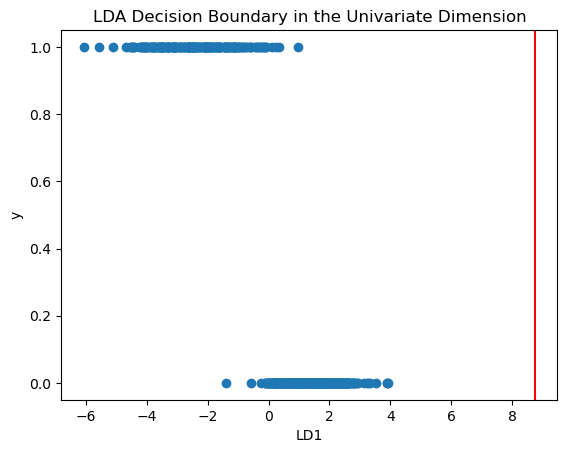

8.73730026808217


In [19]:
# Visulisation
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)
mean_0 = np.mean(X_lda[y==0])
mean_1 = np.mean(X_lda[y==1])
std_0=np.std(X_lda[y==0])
std_1=np.std(X_lda[y==1])

# Create a scatter plot of the data points
plt.scatter(X_lda, y)

x=discriminant_point(mean_0,mean_1,std_0,std_1)
# Plot the decision boundary
plt.axvline(x, color='r')
# Add axis labels and a title
plt.xlabel('LD1')
plt.ylabel('y')
plt.title('LDA Decision Boundary in the Univariate Dimension')

# Show the plot
plt.show()
print(x)

In [20]:
# shuffuling of coulumns
df = normalized_df.sample(frac=1, axis=1).sample(frac=1).reset_index(drop=True)
df

,smoothness_mean,perimeter_worst,fractal_dimension_worst,concave points_worst,radius_se,texture_se,compactness_se,radius_worst,texture_worst,concavity_worst,...,smoothness_se,fractal_dimension_mean,symmetry_worst,perimeter_se,concave points_se,compactness_worst,symmetry_se,perimeter_mean,area_worst,concave points_mean
0,0.191958,0.093409,-1.285946,-0.089853,0.421286,-0.733716,-0.624705,0.103618,-1.428060,-0.523938,...,0.015994,-1.178071,0.260629,0.443623,0.172417,-0.646799,0.256183,0.020051,-0.014411,-0.074457
1,-0.900893,-0.482142,-1.164692,-0.842754,-0.515923,0.027457,-0.921034,-0.399150,1.009196,-1.092593,...,-0.328717,-1.176655,-0.961338,-0.597995,-0.884908,-0.921370,-1.015234,-0.387956,-0.444327,-0.806620
2,-0.402462,-0.267575,-0.430524,-0.532101,-0.527462,0.518712,-0.649837,-0.194319,0.748875,-1.007760,...,0.115910,-0.629941,-1.090647,-0.593049,-0.284612,-0.654426,-0.957167,-0.092048,-0.291476,-0.772086
3,-1.855805,-0.226209,-0.980873,-1.053305,-0.544771,-1.078682,-0.631965,-0.157077,-0.928569,-0.783377,...,-1.103400,-1.141246,-0.579878,-0.572276,-0.774703,-0.832388,-0.492634,-0.150570,-0.239120,-1.041474
4,-0.118762,3.176509,-0.097768,0.780343,2.765210,0.725365,-0.596781,3.356093,3.495261,0.344054,...,-0.829297,-0.857974,-0.052945,2.415080,-0.407783,0.064416,-0.831356,1.800035,4.481174,0.967477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.887384,0.024962,-0.515790,-0.283973,-0.546935,0.248612,-0.278448,0.006375,0.441371,0.505664,...,-0.963851,-0.755997,-0.694639,-0.431316,-0.477796,0.067594,-0.798694,0.091762,-0.089431,-0.506900
565,-0.324960,-0.040509,-0.614343,-0.479615,-0.666295,-1.078139,-0.768234,0.033272,-0.477888,-0.318689,...,-0.747699,-0.557706,1.130229,-0.684549,-0.793989,-0.420532,0.241666,0.158939,-0.091188,-0.678279
566,1.986594,-1.345172,-0.377926,-1.320906,-0.169383,1.541102,0.343698,-1.387100,0.221725,-0.874924,...,1.628307,0.675941,0.115156,-0.184513,-0.411186,-0.536843,1.575988,-1.539856,-1.067328,-1.022094
567,-0.123739,-1.307080,-0.372389,-1.158429,-0.331655,-0.431350,2.353106,-1.418342,-1.400401,-0.566139,...,3.766512,1.250982,-2.018437,0.204733,1.828743,-0.421803,0.398930,-1.371707,-1.074180,-0.665909


In [21]:
#training and matrics
sum=0.0
acc=0
pre=0
rec=0
acclist=np.zeros(10)
prelist=np.zeros(10)
reclist=np.zeros(10)
for i in range(10):
    train_x=df.sample(frac=0.67,random_state=i+1)
    train_y=train_x['diagnosis']
    train_x.drop('diagnosis',axis=1)

    train=df.sample(frac=0.67,random_state=i+1)
    test_x=df.drop(train.index)
    test_y=test_x['diagnosis']
    test_x.drop('diagnosis',axis=1)
    
    clf=LDA()
    clf.fit(train_x,train_y)
    sum =sum+clf.score(test_x,test_y)
    y_test = test_y.to_numpy()
    y_pred = clf.predict(test_x)
    c_mat=confusion_matrix(y_test,y_pred)
    acc = (c_mat[0][0] + c_mat[1][1])*100 /(c_mat[0][0] + c_mat[0][1] + c_mat[1][0] + c_mat[1][1])
    acclist[i]=acc
    pre = (c_mat[0][0]*100) / (c_mat[0][1] + c_mat[0][0])
    prelist[i]=pre
    rec =(c_mat[0][0])*100 / (c_mat[0][0] + c_mat[1][0])
    reclist[i]=rec
    
    
    
score=sum*10


print("\n",score,"\n",acclist.sum()/10,acclist.std(),"\n",prelist.sum()/10,prelist.std()/100,"\n",reclist.sum()/10,reclist.std()/100)


 95.2659574468085 
 95.26595744680851 0.9648062312349482 
 99.07956361030509 0.007003851907514033 
 93.80394216762372 0.018539619284710877


In [22]:
# seperating
X = df.iloc[:, :-1]
y = normalized_df['diagnosis']
X

,smoothness_mean,perimeter_worst,fractal_dimension_worst,concave points_worst,radius_se,texture_se,compactness_se,radius_worst,texture_worst,concavity_worst,...,texture_mean,smoothness_se,fractal_dimension_mean,symmetry_worst,perimeter_se,concave points_se,compactness_worst,symmetry_se,perimeter_mean,area_worst
0,0.191958,0.093409,-1.285946,-0.089853,0.421286,-0.733716,-0.624705,0.103618,-1.428060,-0.523938,...,-1.353081,0.015994,-1.178071,0.260629,0.443623,0.172417,-0.646799,0.256183,0.020051,-0.014411
1,-0.900893,-0.482142,-1.164692,-0.842754,-0.515923,0.027457,-0.921034,-0.399150,1.009196,-1.092593,...,1.357894,-0.328717,-1.176655,-0.961338,-0.597995,-0.884908,-0.921370,-1.015234,-0.387956,-0.444327
2,-0.402462,-0.267575,-0.430524,-0.532101,-0.527462,0.518712,-0.649837,-0.194319,0.748875,-1.007760,...,0.455786,0.115910,-0.629941,-1.090647,-0.593049,-0.284612,-0.654426,-0.957167,-0.092048,-0.291476
3,-1.855805,-0.226209,-0.980873,-1.053305,-0.544771,-1.078682,-0.631965,-0.157077,-0.928569,-0.783377,...,-0.727650,-1.103400,-1.141246,-0.579878,-0.572276,-0.774703,-0.832388,-0.492634,-0.150570,-0.239120
4,-0.118762,3.176509,-0.097768,0.780343,2.765210,0.725365,-0.596781,3.356093,3.495261,0.344054,...,2.750582,-0.829297,-0.857974,-0.052945,2.415080,-0.407783,0.064416,-0.831356,1.800035,4.481174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.887384,0.024962,-0.515790,-0.283973,-0.546935,0.248612,-0.278448,0.006375,0.441371,0.505664,...,0.011707,-0.963851,-0.755997,-0.694639,-0.431316,-0.477796,0.067594,-0.798694,0.091762,-0.089431
565,-0.324960,-0.040509,-0.614343,-0.479615,-0.666295,-1.078139,-0.768234,0.033272,-0.477888,-0.318689,...,-0.378897,-0.747699,-0.557706,1.130229,-0.684549,-0.793989,-0.420532,0.241666,0.158939,-0.091188
566,1.986594,-1.345172,-0.377926,-1.320906,-0.169383,1.541102,0.343698,-1.387100,0.221725,-0.874924,...,0.393010,1.628307,0.675941,0.115156,-0.184513,-0.411186,-0.536843,1.575988,-1.539856,-1.067328
567,-0.123739,-1.307080,-0.372389,-1.158429,-0.331655,-0.431350,2.353106,-1.418342,-1.400401,-0.566139,...,-0.820651,3.766512,1.250982,-2.018437,0.204733,1.828743,-0.421803,0.398930,-1.371707,-1.074180


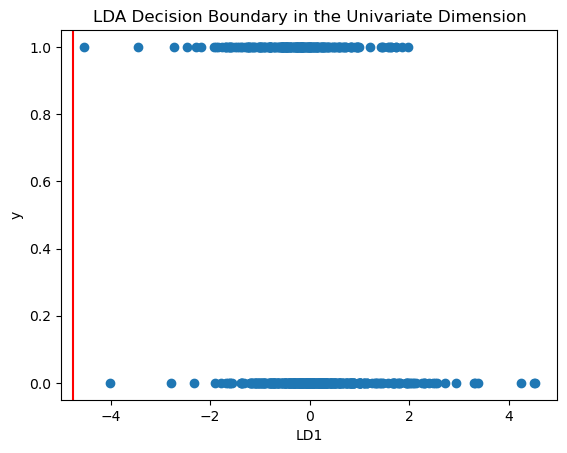

-4.764832894186511


In [23]:
# Visulaisation
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)
mean_0 = np.mean(X_lda[y==0])
mean_1 = np.mean(X_lda[y==1])
std_0=np.std(X_lda[y==0])
std_1=np.std(X_lda[y==1])

# Create a scatter plot of the data points
plt.scatter(X_lda, y)
x=discriminant_point(mean_0,mean_1,std_0,std_1)
# Plot the decision boundary
plt.axvline(x, color='r')

# Add axis labels and a title
plt.xlabel('LD1')
plt.ylabel('y')
plt.title('LDA Decision Boundary in the Univariate Dimension')

# Show the plot
plt.show()
print(x)